<a href="https://colab.research.google.com/github/shrinivasR/shrinivas-telecom-churn-analysis/blob/main/Srinivas_telecom_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT : TELECOM CHURN ANALYSIS
## Orange S.A., formerly France Telecom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
## Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

**The main objective of the project is to :**


*   Finding factors and cause those influence customers to churn.
*   Retain churn customers by taking appropriate steps 
*   Providing offers based on affecting factors.

# Loading Data and Importing Modules

In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#insert the data file 
df=pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

## ***About The Data***

In [ ]:
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
df.tail(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
print("Features of telecom service:")
df.columns

Features of telecom service:


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

** Features of telecom service :**

**STATE:**
51 Unique States name

**Account** **Length:**
Length of The Account

**Area Code:**
Code Number of Area having some States

**International Plan:**
Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:**
Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:**
Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes:**
 Total Number of Minutes Spent  in Morning

**Total day calls:**
 Total Number of Calls made  in Morning.

**Total day charge:**
 Total Charge to the Customers in Morning.

**Total eve minutes:**
Total Number of Minutes Spent  in Evening

**Total eve calls:**
 Total Number of Calls made r in Evening.

**Total eve charge:**
 Total Charge to the Customers in Morning.

**Total night minutes:**
 Total Number of Minutes Spent  in the Night.

**Total night calls:**
 Total Number of Calls made  in Night.

**Total night charge:**
 Total Charge to the Customers in Night.

 **Customer service calls**
 Number of customer service calls made by customer

 **Churn**
 Customer Churn, True means churned customer, False means retained customer

In [ ]:
#shape of date set
df.shape

(3333, 20)

In [ ]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#olny max of of day's
df[['Total day calls','Total eve calls','Total night calls']].max()

Total day calls      165
Total eve calls      170
Total night calls    175
dtype: int64

In [ ]:
#how many states in data set
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
#what are Area code in data set
df['Area code'].unique()

array([415, 408, 510])

In [ ]:
df.loc[0:20,['State','Total night minutes']].max()


State                     WV
Total night minutes    326.4
dtype: object

In [ ]:
#finding maximum
df[['Total day calls','Total eve calls','Total night calls']].max()

Total day calls      165
Total eve calls      170
Total night calls    175
dtype: int64

In [ ]:
#finding maximum
df[['Total day charge','Total eve charge','Total night charge']].max()

Total day charge      59.64
Total eve charge      30.91
Total night charge    17.77
dtype: float64

In [ ]:
#finding nan value 
df['Number vmail messages']=='NaN'

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Number vmail messages, Length: 3333, dtype: bool

In [ ]:
count = (df['Number vmail messages'] == 0).sum()
print(f'Count of zeros in Number vmail messages : ', count)

Count of zeros in Number vmail messages :  2411


In [ ]:
#check for count of missing values in each column
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


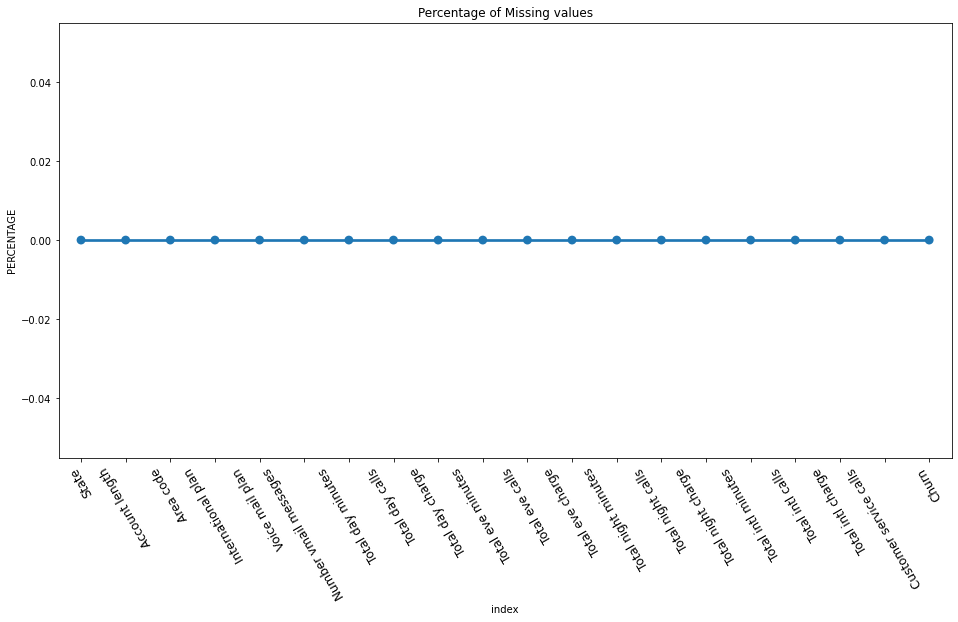

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,8))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =120,fontsize =12)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# how many customer are have a International plan or not

In [ ]:
new_columns1=df[['International plan']].copy()

In [ ]:
print(new_columns1)

     International plan
0                    No
1                    No
2                    No
3                   Yes
4                   Yes
...                 ...
3328                 No
3329                 No
3330                 No
3331                Yes
3332                 No

[3333 rows x 1 columns]


In [ ]:
z=(new_columns1['International plan']).value_counts()

In [ ]:
print(z)

No     3010
Yes     323
Name: International plan, dtype: int64


In [ ]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


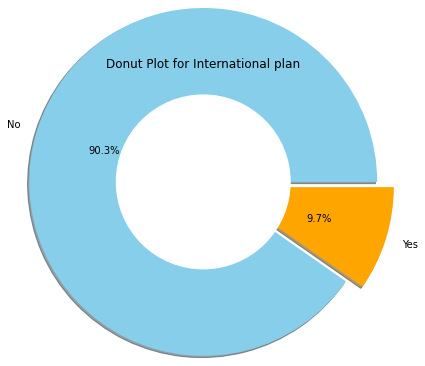

In [ ]:
#To get the Donut Plot to analyze International Plan
data =df['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

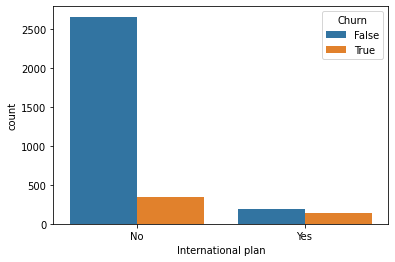

In [ ]:
#Analysing by using countplot
sns.countplot(x='International plan',hue="Churn",data =df)

***From the above data we get:***

***There are 3010 customers who  dont have a international plan.***

***There are 323 customers who have a international plan.***

***Among those who have a international plan 42.4 % people churn.***

***Whereas among those who dont have a international plan only 11.4 % people churn.***

***So basically the people who bought International plans are churning in big numbers.***

***Probably because of connectivity issues or high call charge.***

# how many coustmer are churn



In [ ]:
#how many false are in 'churn'colum
print(df['Churn'].value_counts()[False])

2850


In [ ]:
#how many true are in 'churn'colum
print(df['Churn'].value_counts()[True])

483


In [ ]:
df2 = df.groupby('State')['Churn'].mean()

In [ ]:
df2

State
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
GA    0.148148
HI    0.056604
IA    0.068182
ID    0.123288
IL    0.086207
IN    0.126761
KS    0.185714
KY    0.135593
LA    0.078431
MA    0.169231
MD    0.242857
ME    0.209677
MI    0.219178
MN    0.178571
MO    0.111111
MS    0.215385
MT    0.205882
NC    0.161765
ND    0.096774
NE    0.081967
NH    0.160714
NJ    0.264706
NM    0.096774
NV    0.212121
NY    0.180723
OH    0.128205
OK    0.147541
OR    0.141026
PA    0.177778
RI    0.092308
SC    0.233333
SD    0.133333
TN    0.094340
TX    0.250000
UT    0.138889
VA    0.064935
VT    0.109589
WA    0.212121
WI    0.089744
WV    0.094340
WY    0.116883
Name: Churn, dtype: float64

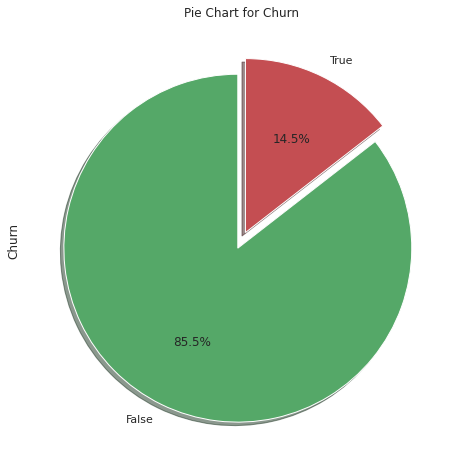

In [ ]:
#To get the pie chart to analyze churn
df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8),colors=['g' ,'r'])
plt.title('Pie Chart for Churn')
plt.show()

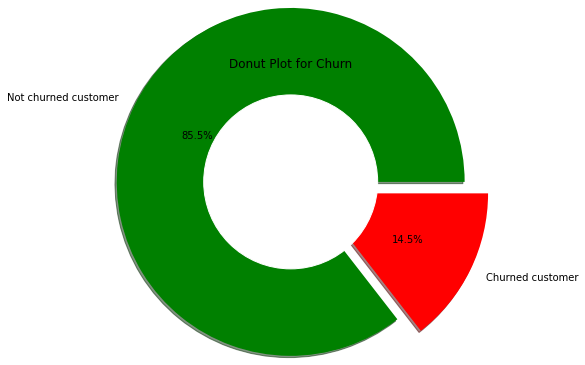

In [ ]:
#To get the Donut Plot to analyze churn
data =df['Churn'].value_counts()
explode = (0, 0.3)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['g' ,'r'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

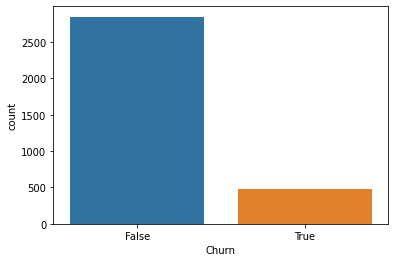

In [ ]:
#let's see churn by using countplot
sns.countplot(x=df.Churn)

# Analyzing State Column

In [ ]:
#printing the unique value of sate column
df['State'].nunique()

51

In [ ]:
#calculate State vs Churn percentage
State_data = pd.crosstab(df["State"],df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

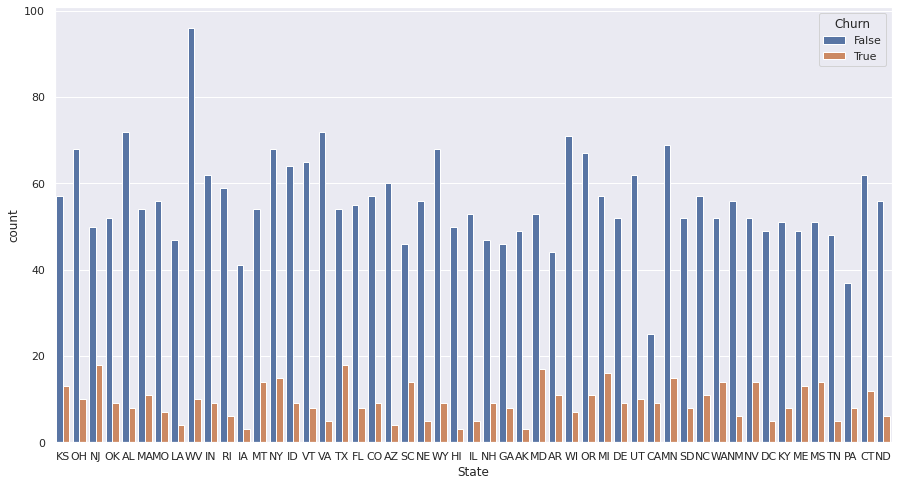

In [ ]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=df)
plt.show()

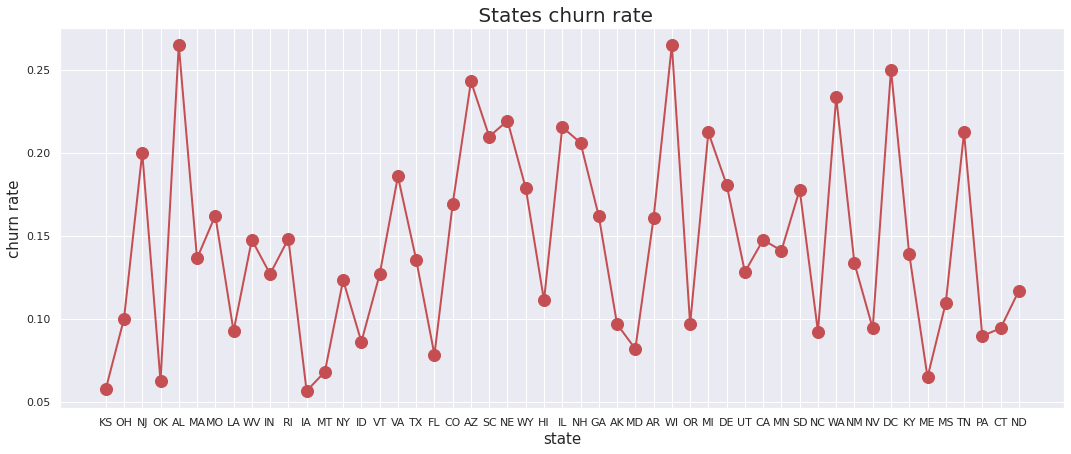

In [ ]:
s1=df['State'].unique()
s2=df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

# Analyzing "Number vmail messages" column

In [ ]:
#Show the details of 'Number vmail messages' data
df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


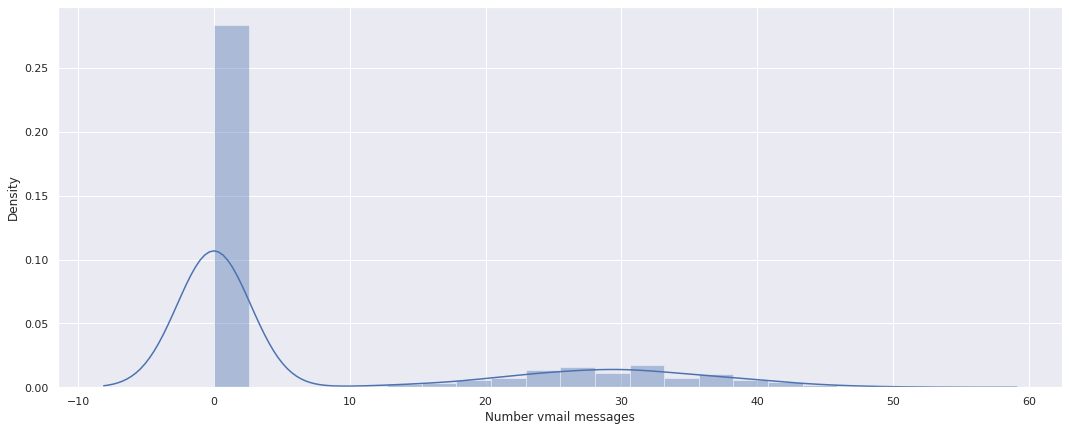

In [ ]:
#Analysing by using displot diagram
sns.distplot(df['Number vmail messages'])

# Analyzing "Area Code" column

In [ ]:
dff=df.groupby(['Area code','State'])

In [ ]:
area_averge=df.groupby(['Area code']).mean()
area_averge



,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Area code,,,,,,,,,,,,,,,,
408,101.877088,7.668258,177.175418,100.496420,30.120274,201.284248,99.788783,17.109308,199.214678,99.039379,8.964785,10.126372,4.426014,2.734737,1.519093,0.145585
415,101.068882,8.357704,181.592628,100.576435,30.871335,200.652085,100.503927,17.055571,202.037583,100.398187,9.091795,10.343444,4.561934,2.793257,1.554079,0.142598
510,100.246429,8.019048,178.787619,100.097619,30.394429,201.323929,99.671429,17.112940,200.229048,100.601190,9.010310,10.138810,4.370238,2.737857,1.623810,0.148810


In [ ]:
#calculate Area code vs Churn percentage
Area_code_data = pd.crosstab(df["Area code"],df["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


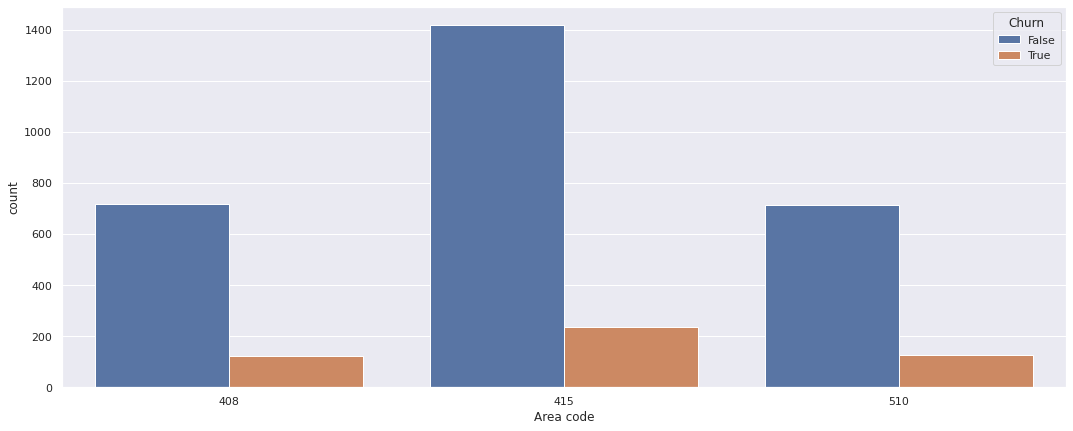

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Area code', hue="Churn", data=df)
plt.show()

In the above data, we notice that there is only 3 unique value are there i.e408,415,510 and the churn rate of these area codes are almost same.

we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.

# Analyzing "Customer service calls" colum

In [ ]:
#Printing the data of customer service calls 
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
#Calculating the Customer service calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


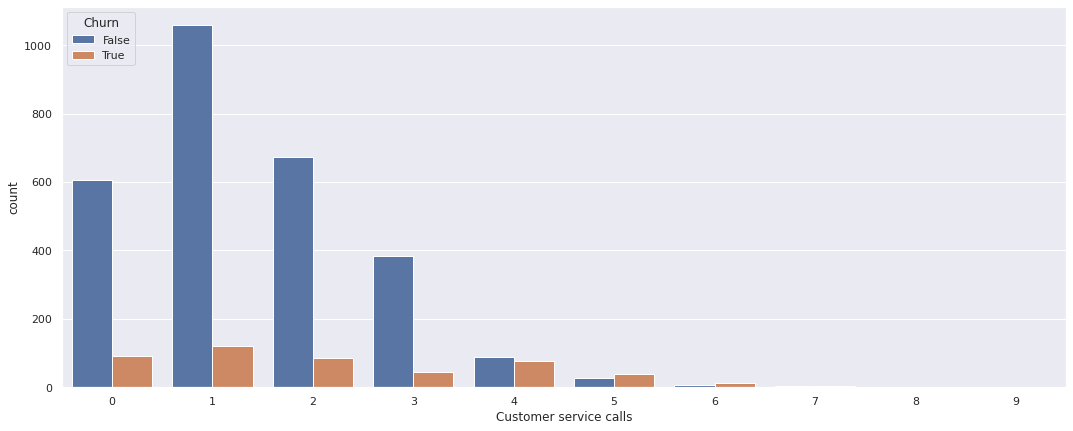

In [ ]:
#Analysing using countplot
sns.countplot(x='Customer service calls',hue="Churn",data =df)

It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.

The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,

And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.

So operator should work to improve the service call.

# Analyzing all calls minutes,all calls, all calls charge together

In [ ]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = df['Total day charge'].mean()/df['Total day minutes'].mean()
eve_charge_perm = df['Total eve charge'].mean()/df['Total eve minutes'].mean()
night_charge_perm =df['Total night charge'].mean()/df['Total night minutes'].mean()
int_charge_perm= df['Total intl charge'].mean()/df['Total intl minutes'].mean()

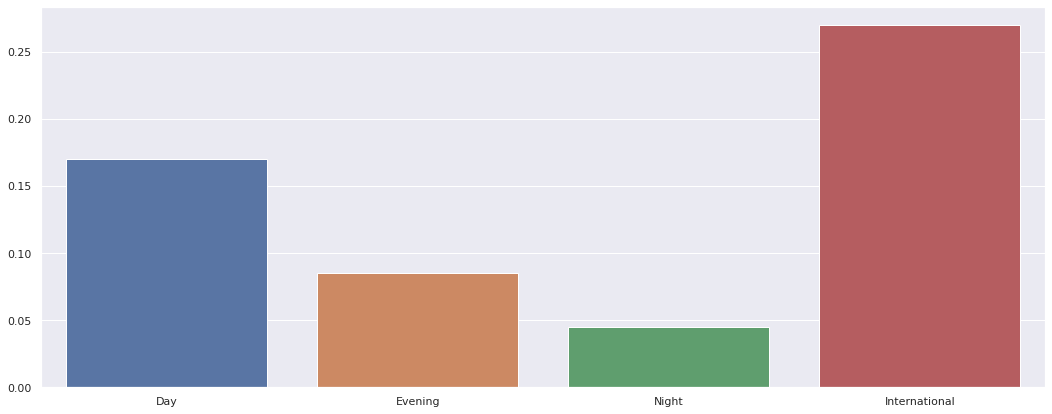

In [ ]:
from seaborn.widgets import color_palette
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

After analyzing the above dataset we have noticed that total day/night/eve minutes/call/charges are not put any kind of cause for churn rate. But international call charges are high as compare to others it's an obvious thing but that may be a cause for international plan customers to churn out

## Graphical Analysis

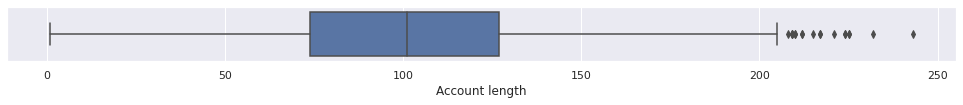

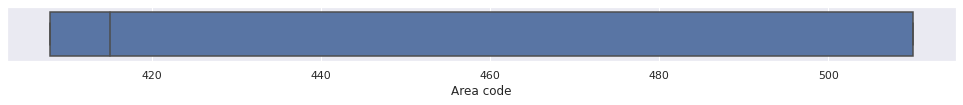

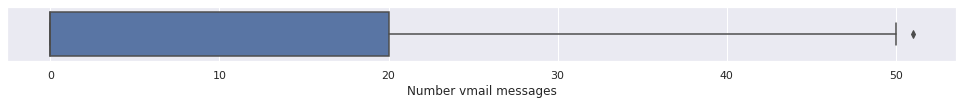

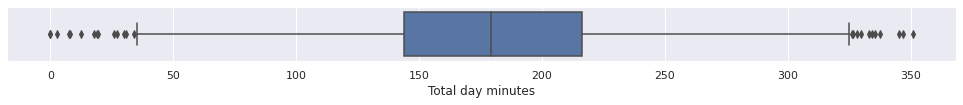

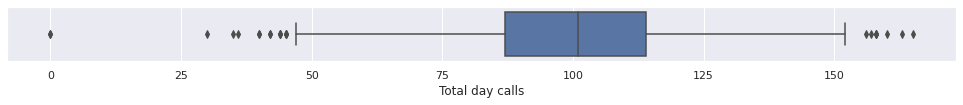

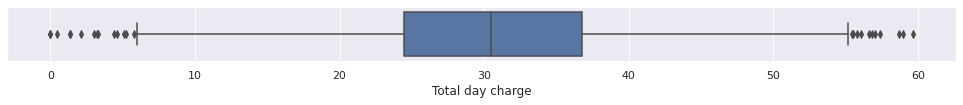

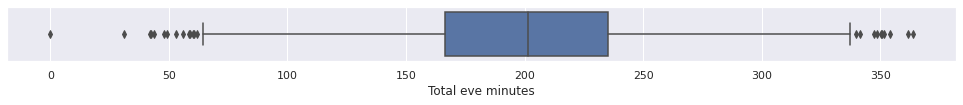

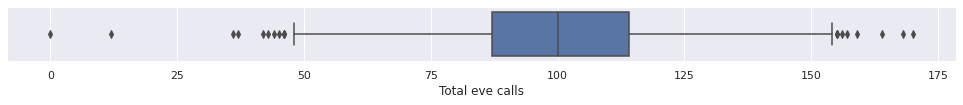

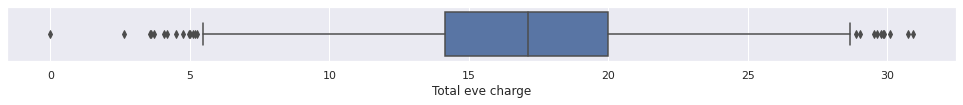

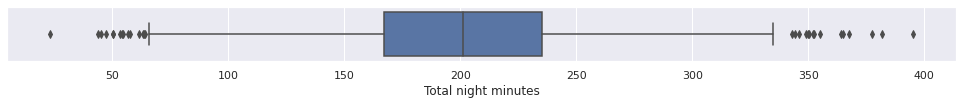

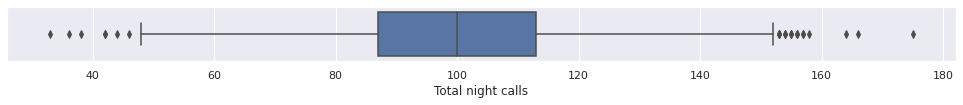

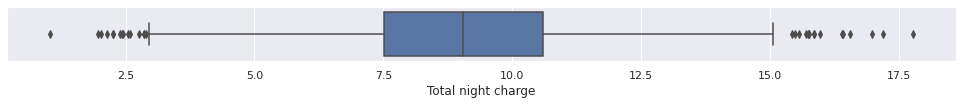

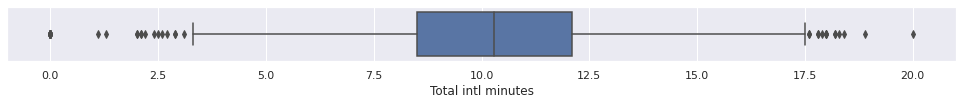

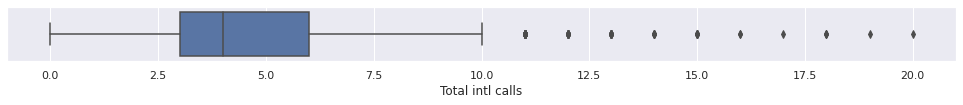

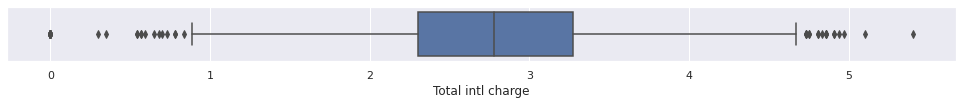

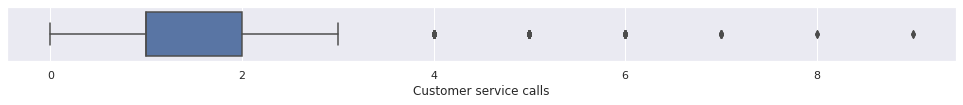

In [ ]:
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expl

<Figure size 1224x72 with 0 Axes>

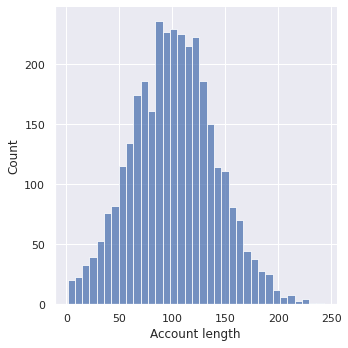

<Figure size 1224x72 with 0 Axes>

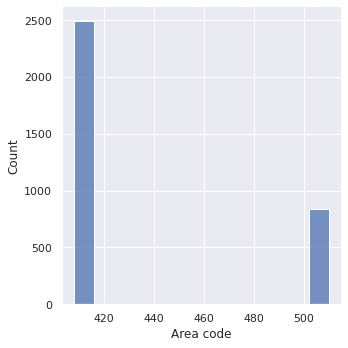

<Figure size 1224x72 with 0 Axes>

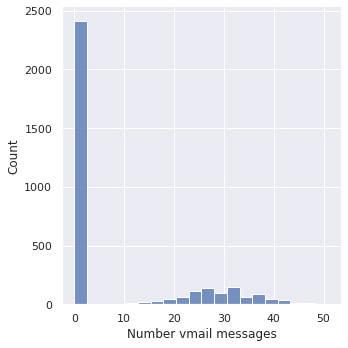

<Figure size 1224x72 with 0 Axes>

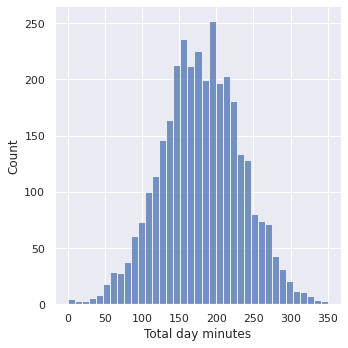

<Figure size 1224x72 with 0 Axes>

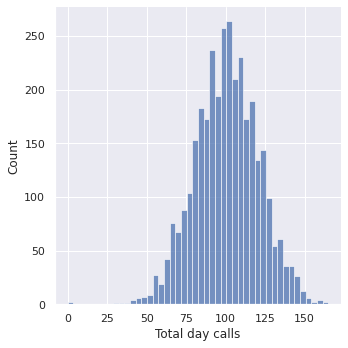

<Figure size 1224x72 with 0 Axes>

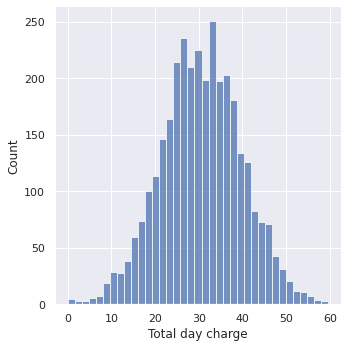

<Figure size 1224x72 with 0 Axes>

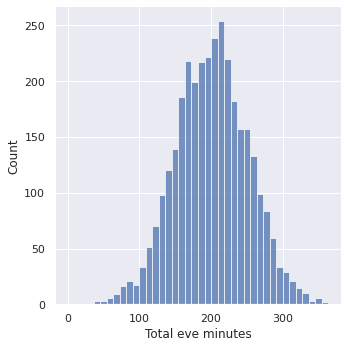

<Figure size 1224x72 with 0 Axes>

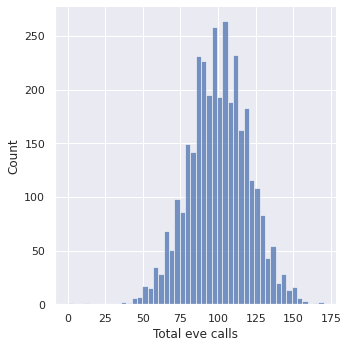

<Figure size 1224x72 with 0 Axes>

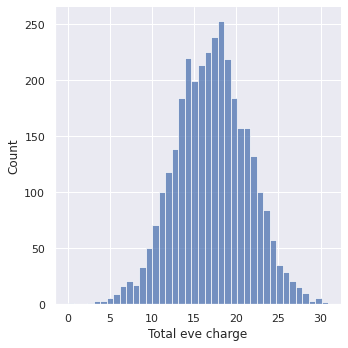

<Figure size 1224x72 with 0 Axes>

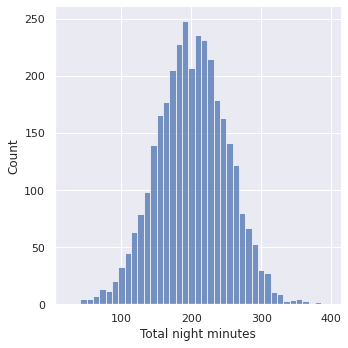

<Figure size 1224x72 with 0 Axes>

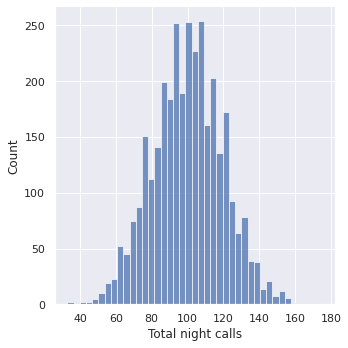

<Figure size 1224x72 with 0 Axes>

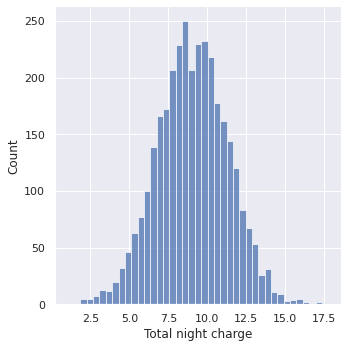

<Figure size 1224x72 with 0 Axes>

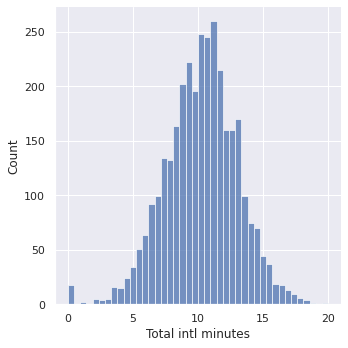

<Figure size 1224x72 with 0 Axes>

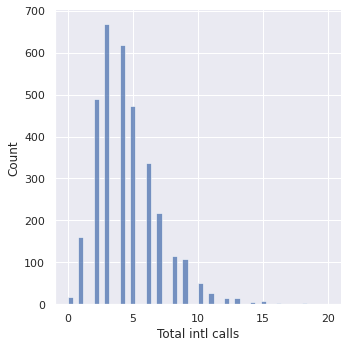

<Figure size 1224x72 with 0 Axes>

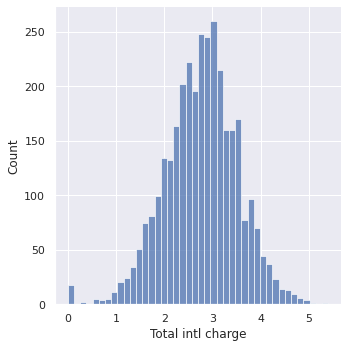

<Figure size 1224x72 with 0 Axes>

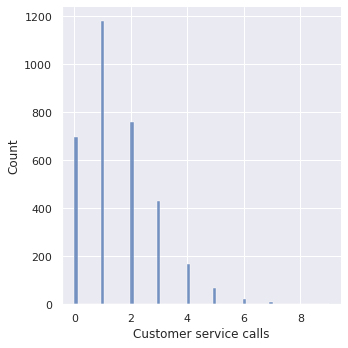

In [ ]:
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

# Visualization using correlation plot

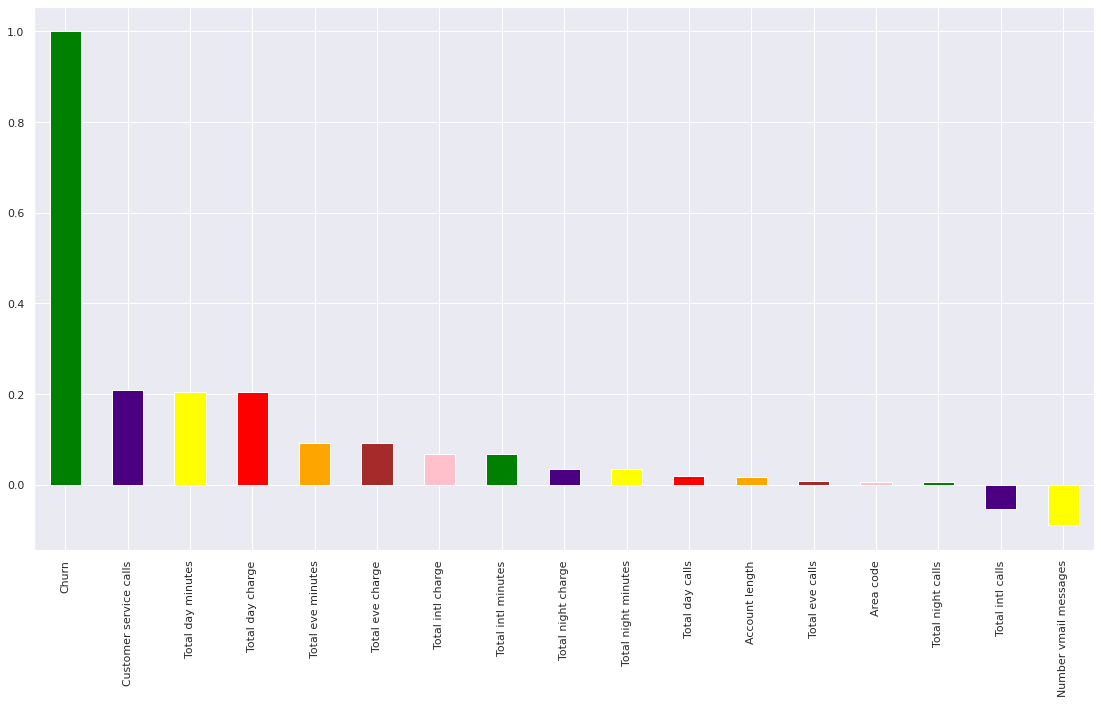

In [ ]:
# visualization using correlation plot
plt.figure(figsize=(19,10))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['green','indigo','yellow','red','orange','brown','pink'])

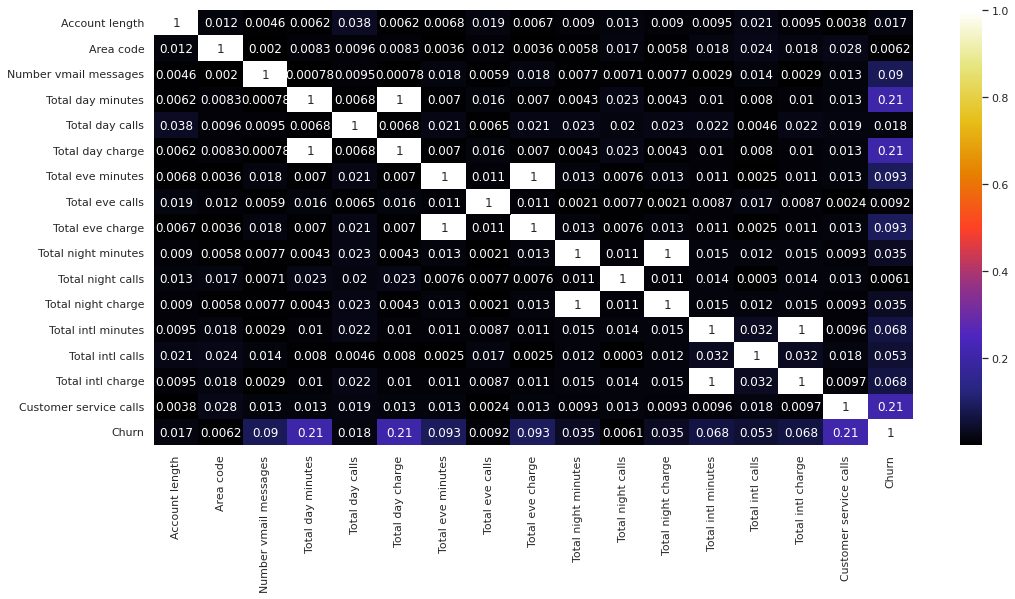

In [ ]:
# plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

### ***CONCLUSION:***

***After performing exploratory data analysis on the data set, this is what we have incurred from data:***
* ***There are some states where the churn rate is high as compared to others may be due to low network coverage.***
****Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns***
****In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge***
****IN the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good***.
****Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls,  Total eve charge, Total night minutes,  Total night calls,  Total night charge, these columns didn't play any kind of role regarding the churn rate.***
****In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.***
****In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.*** 

### **RECCOMENDATIONS:**


* ***Improve network coverage churned state***
*  ***In international plan provide some discount plan to the customer***
*  ***Improve the voice mail quality or take feedback from the customer***
*  ***Improve the service of call center and take frequently feedback from the customer regarding their issue and try to solve it as soon as possible***